# 一种可抵抗已知明文攻击的基于流密码与块置乱的图像加密算法——基于动态密钥生成

1. 现有的针对块置乱的攻击
2. 使用现有的攻击方法对原加密算法进行攻击
3. 应用动态密钥生成策略提高原加密算法抵抗已知明文攻击与选择明文攻击的能力

## 研究一: 现有的针对块置乱图像加密算法的攻击

### 研究步骤

1. 查询现有的针对块置乱图像加密算法的攻击方案
2. 分析现有攻击方案所需的前提条件与攻击效率

### 研究成果

1. 现有的针对块置乱图像加密算法的攻击方案

> [1]Shujun Li,Chengqing Li,Guanrong Chen,Nikolaos G. Bourbakis,Kwok-Tung Lo. A general quantitative cryptanalysis of permutation-only multimedia ciphers against plaintext attacks[J]. Signal Processing: Image Communication,2008,23(3).

> [2]Data Encryption; New Data Encryption Study Findings Reported from Griffith University (On the Security of Permutation-Only Image Encryption Schemes)[J]. Information Technology Newsweekly,2016.

- 假设图像的高度与宽度分别为 $M$ 与 $N$, 像素的灰度值空间大小为 $L$, 攻击者所掌握的明文密文对的数量为 $n$
- 仅使用块置乱的图像加密算法遇到已知明文攻击时, 攻击者一般情况下仅需要掌握 $O(log_L(M \cdot N))$ 对明文-密文图像即可恢复可观的映射关系
- 仅使用块置乱的图像加密算法遇到选择明文攻击时, 攻击者仅需要构建 $log_L(M \cdot N)$ 幅明文图像并获得其对应的密文图像即可完整恢复映射关系

2. 现有攻击方案所需的前提条件与攻击效率
- 仅使用块置乱的图像加密算法时, 置乱前后的块中的像素及像素的位置关系将保持不变, 且加密者使用相同的映射关系对多幅图片进行加密, 攻击者根据该特点可以发起时间复杂度仅为 $O(2n \cdot M \cdot N)$ 的攻击, 其中 $n$ 越大, 可以恢复的映射关系数量的期望占所有映射关系的比例 $p$ 越高, $n-p$的关系如下图所示 

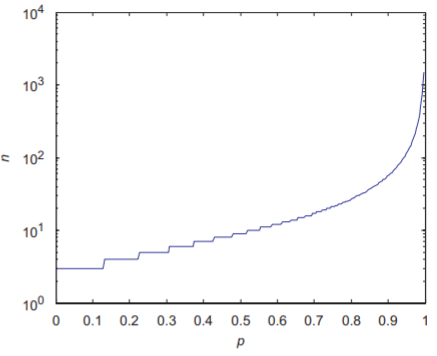

<center>攻击者所掌握的明文-密文图像对 $n$ 与攻击者预期可以恢复的映射关系占所有映射关系的比例 $p$ 之间的关系<\center>

- 同理可知, 当攻击者可以构建每个分块都独一无二的明文图像时, 若其还可以获得该图像对应的密文图像, 那么攻击者便可以完整恢复置乱时所有块的映射关系

### 研究小结

仅使用块置乱的图像加密算法抵抗已知明文/选择明文攻击的能力非常弱, 攻击者无法获得加密与解密的密钥时, 其掌握少量的具有相同的映射关系的明文-密文图像对也可在可观的时间内恢复出大量的映射关系

## 研究二: 使用现有的攻击方法对原加密算法进行攻击

### 研究步骤

1. 基于`misc标准库`数据集统计图像纹理块与平滑块的个数
2. 统计平滑块在加密后所保留的特征的独立性
3. 基于加密前后块的相似性与独立性评估现有的攻击方案能否对该加密方案构成威胁

### 研究成果

1. 基于`misc标准库`数据集统计图像纹理块与平滑块的个数
    - 该数据集的图片尺寸均为 $512 \times 512$
    - 每个子图的尺寸为 $2 \times 2$
    - 一幅图片可分割为 $256 \times 256$ 幅子图(块)
    - 平滑块定义为四个像素的高三位都相等的子图(块)
    - 纹理块定义为四个像素的高三位存在不相等的子图(块)
    
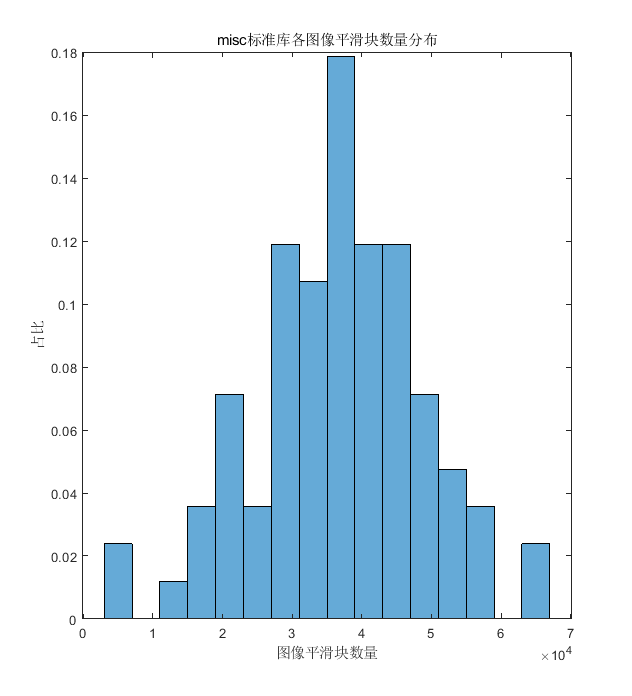
<center>misc标准库各图像平滑块数量分布</ center>

如图所示, 大多数图片中过半以上的子图都是平滑快

2. 统计平滑块在加密后所保留的特征的独立性
    - 这里特征的独立性使用特征相同的块数表征, 特征相同的块数越多, 则独立性越差, 特征相同的块数越少, 则独立性越好
    - 特征独立性越好, 则其抵抗已知明文攻击的能力越弱

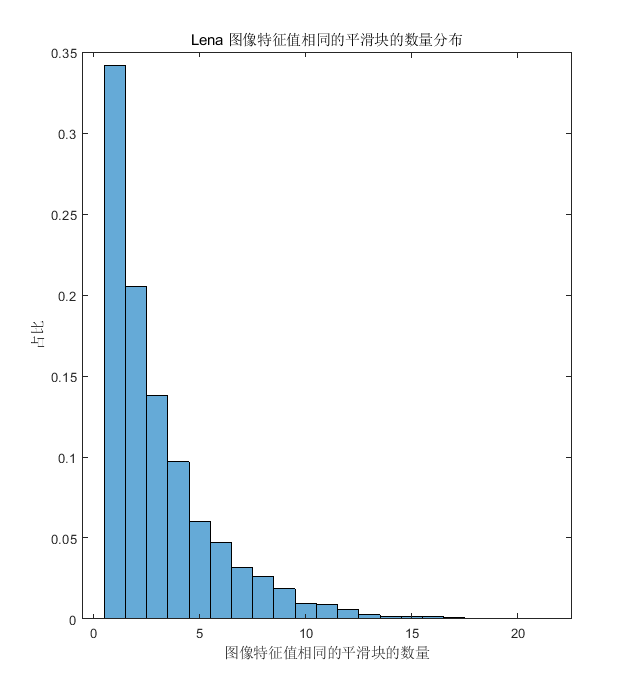
<center>Lena 图像特征值相同的平滑块的数量分布</ center>

如图所示, 对于 Lena 图像而言, 大多数的块都具有独一无二的特征, 对于这些块, 攻击者仅需具有一对明文-密文图片对进行还原其块置乱映射关系

### 研究小结

由于大多数的图片平滑块占主要组成部分, 且每一个平滑块中像素的低五位将不会使用流密码加密, 因此这些像素 LSB 保留的特征可以作为该像素块的标记, 被攻击者用于已知明文攻击

同时, 若攻击者实现选择明文攻击, 其构造一副全部由平滑块组成, 且每一个平滑块中四个像素的低五位都是独一无二的, 那么标记的空间为 $16^4 = 65536$, 与所有子图(块)的数量相同, 此时该加密算法退化为纯块置乱加密, 攻击者仅使用一个明文-密文图像便可以恢复所有的块置乱的映射

因此, 无论是已知明文攻击还是选择明文攻击, 现有的攻击方案均能够对该加密算法构成威胁

## 研究三: 应用动态密钥生成策略提高原加密算法抵抗已知明文攻击与选择明文攻击的能力

### 研究步骤:

1. 分析加密与嵌入数据前后图像中保持不变的信息
2. 应用消息认证码(MAC)实现基于加密与嵌入数据前后图像中保持不变的信息生成子密钥
3. 实现并验证算法的有效性与安全性

### 研究成果

1. 分析加密与嵌入数据前后图像中保持不变的信息
    - 在使用流密码进行异或加密过程中平滑块中所有像素的低五位不发生改变
    - 在对像素块进行块置乱过程中每个像素块中像素的值不发生改变
    - 在对像素块进行块置乱过程中若每个块都具有一个可排序的标记, 置乱前后经过排序的标记不发生改变
    - 在像素嵌入前后每个像素块中参考像素的值不发生改变

    **由上可知:**
    - 提取所有平滑块参考像素的低五位, 并对其排序后的序列在图像整个生命周期(流密码异或加密, 块置乱加密, 数据嵌入与提取, 块置乱还原, 流密码异或解密)中都不发生改变
    - 提取所有平滑块中经过流密码异或加密后的参考像素, 并对其排序后的序列在图像块置乱加密, 数据嵌入与提取, 块置乱还原过程中都不发生改变

2. 应用消息认证码(MAC)实现基于待加密/解密的图像与主密钥动态生成子密钥的加密算法

- 加密
    1. 提取所有平滑块参考像素的低五位并对其进行排序, 获得`递增序列1`
    2. 使用`主密钥`作为 MAC 函数的密钥, 将上一步生成的`递增序列1`作为 MAC 函数输入的消息生成`子密钥1`
    3. 使用上一步生成的`子密钥1`生成用于 XOR 加密的`混沌序列1`
    4. 使用上一步生成的`混沌序列1`对每一个子块进行 XOR 加密
    5. 提取每一个子块中加密后参考像素的像素值并对其进行排序, 获得`递增序列2`
    6. 使用`主密钥`作为 MAC 函数的密钥, 将上一步生成的`递增序列2`作为 MAC 函数输入的消息生成`子密钥2`
    7. 使用上一步生成的`子密钥2`生成用于块置乱加密的`混沌序列2`
    8. 使用上一步生成的`混沌序列2`进行块置乱加密
- 解密
    1. 提取每一个子块中加密后参考像素的像素值并对其进行排序, 获得`递增序列2`
    2. 使用`主密钥`作为 MAC 函数的密钥, 将上一步生成的`递增序列2`作为 MAC 函数输入的消息生成`子密钥2`
    3. 使用上一步生成的`子密钥2`生成用于块置乱加密的`混沌序列2`
    4. 使用上一步生成的`混沌序列2`对密文图像进行块置乱的还原
    5. 提取所有平滑块参考像素的低五位并对其进行排序, 获得`递增序列1`
    6. 使用`主密钥`作为 MAC 函数的密钥, 将上一步生成的`递增序列1`作为 MAC 函数输入的消息生成`子密钥1`
    7. 使用上一步生成的`子密钥1`生成用于 XOR 加密的`混沌序列1`
    8. 使用上一步生成的`混沌序列1`用于图像的 XOR 解密

3. 实现并验证算法的有效性

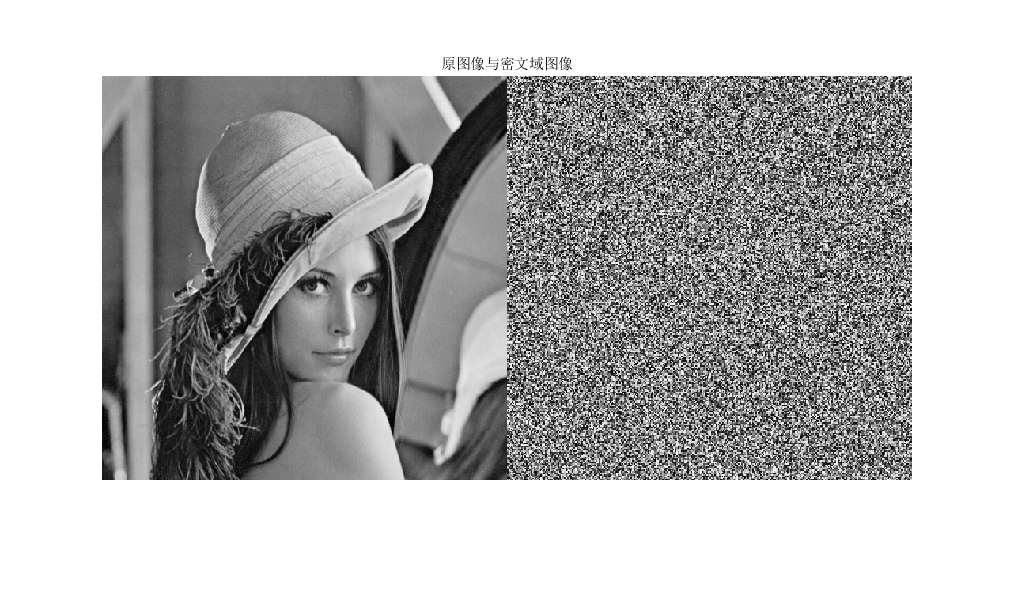
<center>原图像与密文域图像</ center>

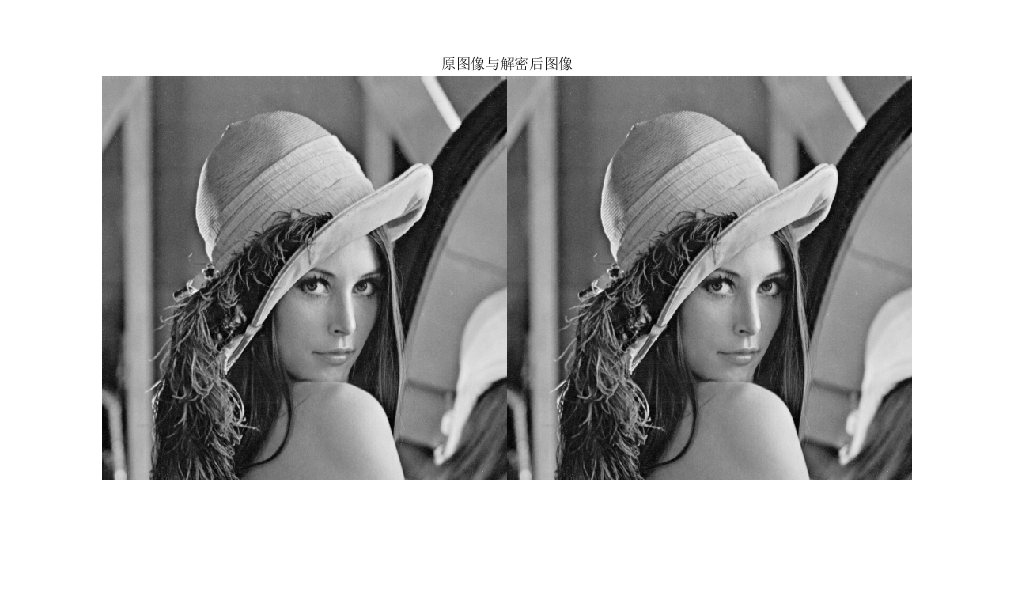
<center>原图像与解密后图像</ center>

|块置乱映射相似性|
| :------------: |
| 1.5259e-05     |
| 4.5776e-05     |
| 0              |
| 0              |



对比原图像与解密后的图像可知, 该算法可以保留全部原算法的特性的同时, 使用同样的主密钥生成的不同图像块置乱映射相似性已不具有显著性, 显著提高了其抵抗已知明文/选择明文攻击的能力

### 研究小结

- 经过理论推导与实验验证, 原加密算法虽然可以抵抗惟密文攻击, 但是其抵抗已知明文/选择明文攻击的能力不足以信任
- 经过理论推导与实验验证, 我实现的基于动态密钥生成的改进方案可以有效提高原加密算法抵抗已知明文/选择明文攻击的能力

## 下一步的工作

1. 设计实验验证动态生成的密钥与不同图片的关系
2. 设计实验验证动态生成的密钥与主密钥的关系

# 实验验证

## 研究二

In [ ]:
imatlab_export_fig('print-png'); % Static png figures.(10 KB) (尺寸最小)

In [3]:
H_sub = 2; % 子图高
W_sub = 2; % 子图宽
n = 256 * 256;
num = 84;
counter = zeros(num, 2);

In [18]:
for img_index = 1:num
    img = pkg.Image(['images/misc/', int2str(img_index), '.bmp']);
    P = img.getGraySubImg(H_sub, W_sub);
    [h, w] = size(P);
    N_sub = H_sub * W_sub;
    n = h * w;
    for index_i = 1:n

        % [数组中的唯一值 - MATLAB unique - MathWorks 中国](https://ww2.mathworks.cn/help/matlab/ref/double.unique.html?s_tid=doc_ta#bs_6vpd-1-C)
        if numel(unique(bitshift(P{index_i}, -5))) == 1 % 四个像素的 MSB 相等
            counter(img_index, 1) = counter(img_index, 1) + 1;
        else
            counter(img_index, 2) = counter(img_index, 2) + 1;
        end

    end
end

In [19]:
for index_i = 1:num
    disp([index_i, counter(index_i, :)])
end

           1       32963       32573

           2       38711       26825

           3       45705       19831

           4       34852       30684

           5       41005       24531

           6       55506       10030

           7       32117       33419

           8       30349       35187

           9       45892       19644

          10       49291       16245

          11       40388       25148

          12       39218       26318

          13       40019       25517

          14       17459       48077

          15       29011       36525

          16       15571       49965

          17       27652       37884

          18       20669       44867

          19       37919       27617

          20       28164       37372

          21       38606       26930

          22       36234       29302

          23       53979       11557

          24       46261       19275

          25       52797       12739

          26       47378       18158

          27

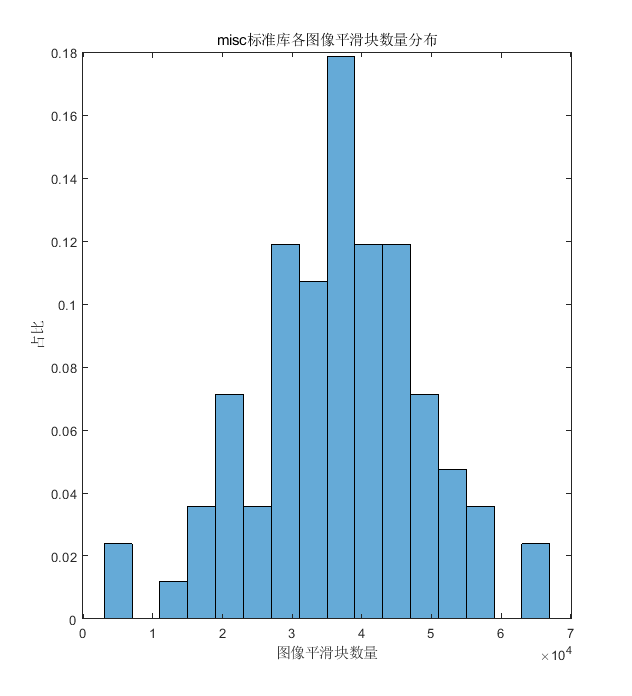

In [20]:
close all;
figure;
set(gcf, 'outerposition', [1 1 640 1080]); % 设置当前图窗大小
% set(gca, 'position', [60 40 1800 1000]); % 设置当前子图的位置
% subplot(1, 2, 1);
histogram(counter(:, 1), 16, 'Normalization', 'probability');
title('misc标准库各图像平滑块数量分布');
xlabel('图像平滑块数量');
ylabel('占比');
% grid('on'); % 显示网格线

In [5]:
img_index = 9;
flat = 45892;

hash_instance = pkg.utils.Hash('SHA-256');
feature = zeros(flat, 1);

img = pkg.Image(['images/misc/', int2str(img_index), '.bmp']);
P = img.getGraySubImg(H_sub, W_sub);
[h, w] = size(P);
N_sub = H_sub * W_sub;
n = h * w;

count = 0;
temp = 0;
for index_i = 1:n

    % [数组中的唯一值 - MATLAB unique - MathWorks 中国](https://ww2.mathworks.cn/help/matlab/ref/double.unique.html?s_tid=doc_ta#bs_6vpd-1-C)
    if numel(unique(bitshift(P{index_i}, -5))) == 1 % 四个像素的 MSB 相等
        count = count + 1;
        
        temp = bitshift(uint32(bitshift(P{index_i}(2), 3)), 16);
        temp = temp + bitshift(uint32(bitshift(P{index_i}(3), 3)), 8);
        temp = temp + uint32(bitshift(P{index_i}(4), 3));
        feature(count) = temp;
    else
    end

end


In [15]:
c = zeros(size(feature));
for index = 1:length(feature)
    c(index) = length(find(feature == feature(index)));
end

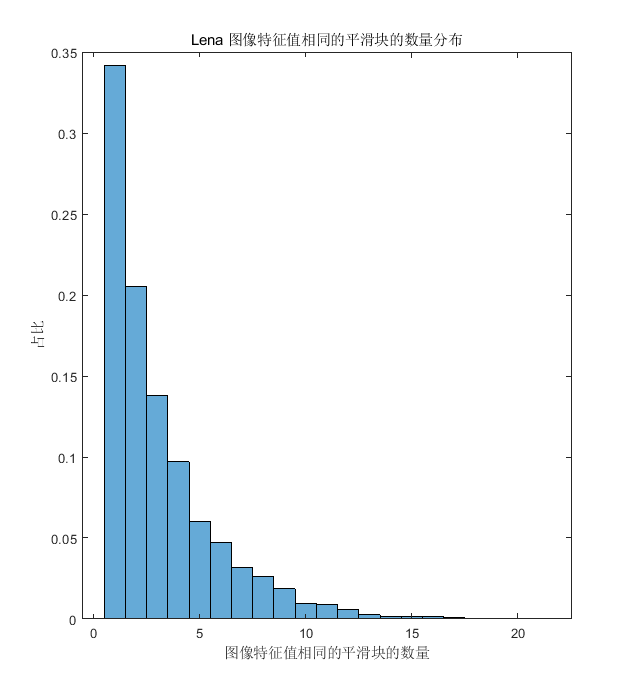

In [17]:
close all;
figure;
set(gcf, 'outerposition', [1 1 640 1080]); % 设置当前图窗大小
% set(gca, 'position', [60 40 1800 1000]); % 设置当前子图的位置
% subplot(1, 2, 1);
histogram(c, 'Normalization', 'probability');
title('Lena 图像特征值相同的平滑块的数量分布');
xlabel('图像特征值相同的平滑块的数量');
ylabel('占比');
% grid('on'); % 显示网格线

## 研究三

### 加密

In [130]:
passphrase = '123456';

plainImage_0 = pkg.Image('.\images\Lena.tiff');
[cipherImage, pixel_0, scramblingEncryptionMap_0] = pkg.improve.cipher.encrypt(plainImage_0, passphrase);

plainImage_2 = pkg.Image('.\images\lake.tiff');
[~, ~, scramblingEncryptionMap_2] = pkg.improve.cipher.encrypt(plainImage_2, passphrase);

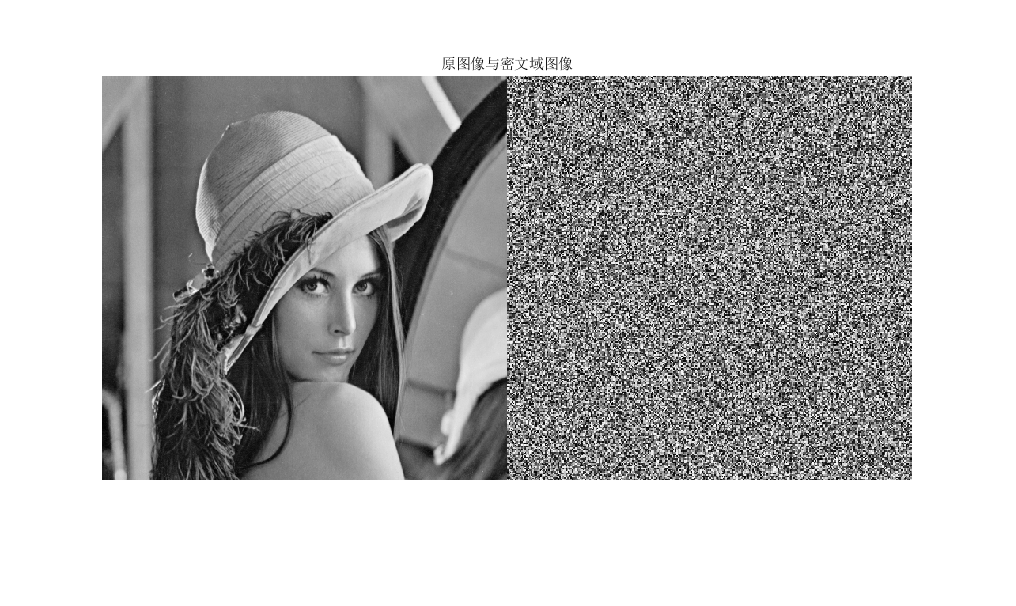

In [131]:
close all;
figure;
set(gcf, 'outerposition', [1 1 1080 640]); % 设置当前图窗大小
% set(gca, 'position', [60 40 1800 1000]); % 设置当前子图的位置
imshowpair(plainImage_0.gray_img, cipherImage.gray_img,'montage');  % 并列显示图像
title('原图像与密文域图像');

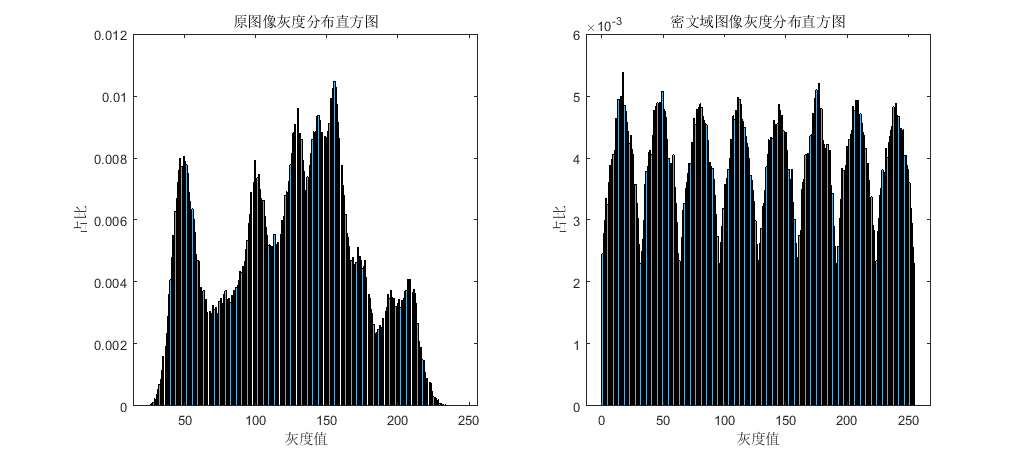

In [132]:
close all;
figure;
set(gcf, 'outerposition', [1 1 1080 540]); % 设置当前图窗大小
% set(gca, 'position', [60 40 1800 1000]); % 设置当前子图的位置
subplot(1, 2, 1);
histogram(plainImage_0.gray_img, 256, 'Normalization', 'probability');
title('原图像灰度分布直方图');
xlabel('灰度值');
ylabel('占比');
subplot(1, 2, 2);
histogram(cipherImage.gray_img, 256, 'Normalization', 'probability');
title('密文域图像灰度分布直方图');
xlabel('灰度值');
ylabel('占比');
% grid('on'); % 显示网格线

In [133]:
% 块置乱映射相似性
sum(scramblingEncryptionMap_0 == scramblingEncryptionMap_2) / numel(scramblingEncryptionMap_0)


ans =

     0



### 解密

In [30]:
[plainImage_1, pixel_1] = pkg.improve.cipher.decrypt(cipherImage, passphrase);

In [31]:
length(pixel_0)
sum(pixel_0 ~= pixel_1, 'all')


ans =

       65536


ans =

     0



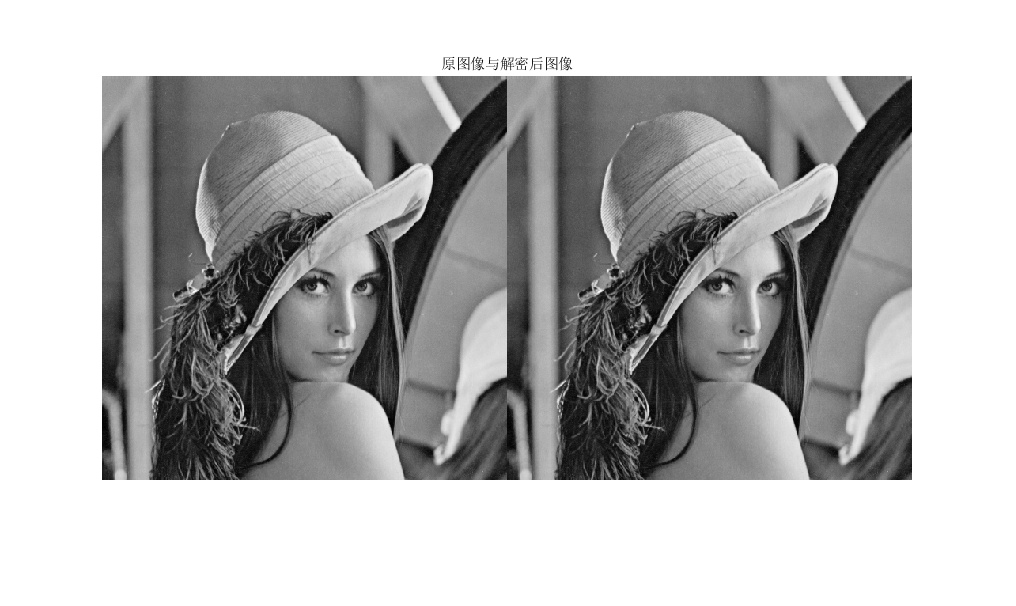

In [46]:
close all;
figure;
set(gcf, 'outerposition', [1 1 1080 640]); % 设置当前图窗大小
% set(gca, 'position', [60 40 1800 1000]); % 设置当前子图的位置
imshowpair(plainImage_0.gray_img, plainImage_1.gray_img,'montage');  % 并列显示图像
title('原图像与解密后图像');

In [33]:
for index_i = 1:512
    for index_j = 1:512
        if plainImage_0.gray_img(index_i, index_j) ~= plainImage_1.gray_img(index_i, index_j)
            disp([index_i, index_j, plainImage_0.gray_img(index_i, index_j), plainImage_1.gray_img(index_i, index_j)]);
        end
    end
end

In [34]:
for index = 1:8
    sum(plainImage_0.bit_plane(:, :, index) ~= plainImage_1.bit_plane(:, :, index), 'all')
end


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0

